# Latihan 2 — Lasso Regression (L1) Tanpa Pipeline

Tujuan latihan ini: meniru konsep di `lesson_03` (Lasso/L1), tetapi menulis semua langkah secara eksplisit tanpa `Pipeline` supaya jelas urutannya:
1) buat fitur polinomial, 2) scaling, 3) fit Lasso, 4) prediksi & plot, 5) cek koefisien yang jadi nol.

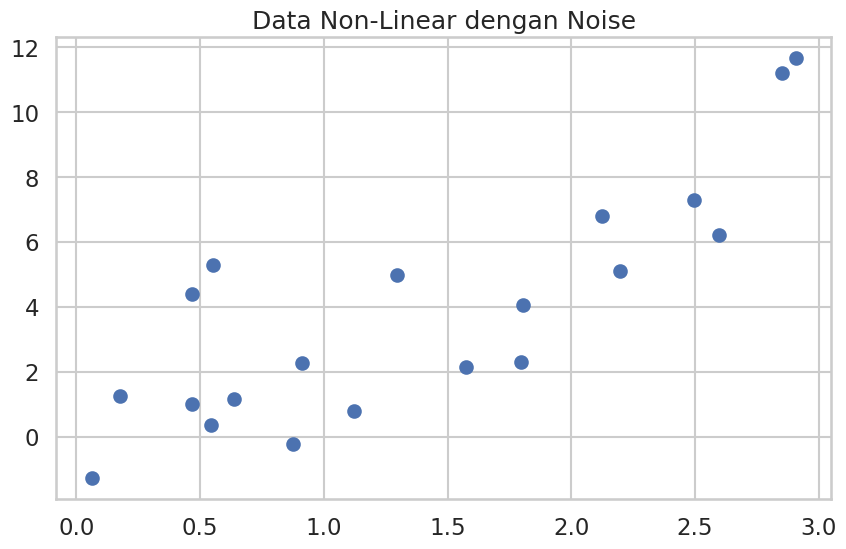

In [5]:
# Setup: import & data (sama konsepnya seperti lesson_03)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso

sns.set_theme(style="whitegrid", context="talk")
np.set_printoptions(precision=2, floatmode="fixed", suppress=True)

# Data non-linear
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + X**2 + 2 * np.random.randn(m, 1)

# Lasso biasanya nyaman dengan target 1D
y_1d = y.ravel()

plt.figure(figsize=(10, 6))
plt.scatter(X, y_1d)
plt.title("Data Non-Linear dengan Noise")
plt.show()

---
## 1) Intuisi singkat (L1)
Lasso meminimalkan: `Error + alpha * Σ|koefisien|`.

Efek khas L1: beberapa koefisien bisa menjadi **persis nol** → ini berperan seperti *feature selection* otomatis.

---
## 2) Implementasi Lasso tanpa Pipeline
Di `Pipeline`, langkah-langkahnya adalah: `PolynomialFeatures` → `StandardScaler` → `Lasso`.
Di sini kita lakukan langkah-langkah itu secara manual agar terlihat jelas kapan `fit_transform` dan `transform` dipakai.

In [6]:
# 1) Buat fitur polinomial (manual)
degree = 10
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

# 2) Scaling (manual)
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# 3a) Fit model tanpa regularisasi (pembanding)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_scaled, y_1d)

# 3b) Fit Lasso (manual)
alpha = 0.1
lasso = Lasso(alpha=alpha, max_iter=10000)
lasso.fit(X_poly_scaled, y_1d)

print(f"Jumlah fitur setelah PolynomialFeatures: {X_poly.shape[1]}")
print(f"Alpha yang dipakai (Lasso): {alpha}")

Jumlah fitur setelah PolynomialFeatures: 10
Alpha yang dipakai (Lasso): 0.1


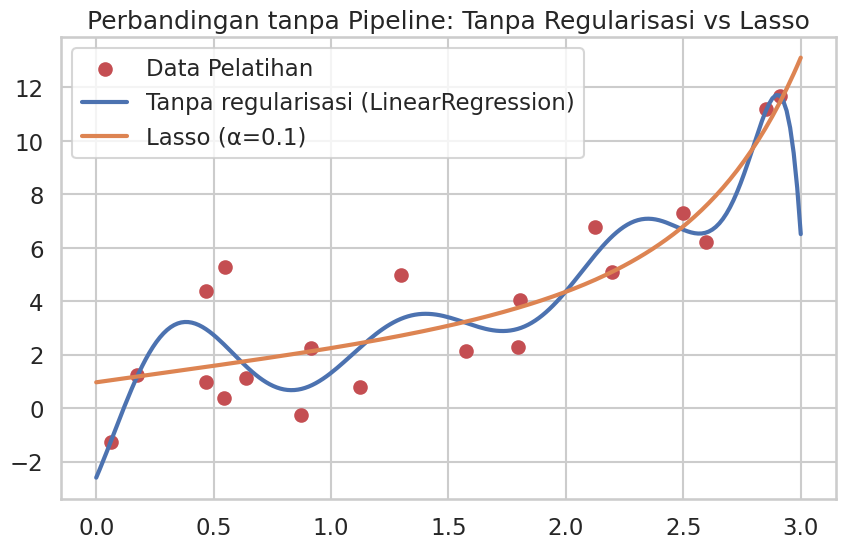

In [7]:
# Prediksi & plot (manual transform untuk data baru)
X_new = np.linspace(0, 3, 200).reshape(-1, 1)
X_new_poly = poly.transform(X_new)
X_new_poly_scaled = scaler.transform(X_new_poly)

# Prediksi pembanding vs Lasso
y_pred_no_reg = lin_reg.predict(X_new_poly_scaled)
y_pred_lasso = lasso.predict(X_new_poly_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X, y_1d, color="r", label="Data Pelatihan")
plt.plot(X_new, y_pred_no_reg, label="Tanpa regularisasi (LinearRegression)", linewidth=3)
plt.plot(X_new, y_pred_lasso, label=f"Lasso (α={alpha})", linewidth=3)
plt.title("Perbandingan tanpa Pipeline: Tanpa Regularisasi vs Lasso")
plt.legend()
plt.show()

---
## 3) Properti kunci: koefisien jadi nol
Mari kita lihat berapa banyak koefisien yang dibuat **persis nol** oleh Lasso (ini yang membedakannya dari Ridge).

In [8]:
coef = lasso.coef_
zero_coef = np.sum(coef == 0)
non_zero_coef = np.sum(coef != 0)

print(f"Semua koefisien Lasso: {coef}")
print(f"Jumlah koefisien yang jadi nol: {zero_coef}")
print(f"Jumlah koefisien yang tidak nol: {non_zero_coef}")

Semua koefisien Lasso: [1.10 0.00 0.00 1.20 0.00 0.00 0.00 0.00 0.00 0.83]
Jumlah koefisien yang jadi nol: 7
Jumlah koefisien yang tidak nol: 3
